Collect The Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(r'C:\Users\Sogol\Desktop\Project\bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Explore The Data

In [4]:
#Summary of the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#Summary Statistics for the numeric features
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [7]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [8]:
data['y']=np.where(data['y']=='no', '0',data['y'])
data['y']=np.where(data['y']=='yes', '1',data['y'])

In [9]:
data['poutcome']=np.where(data['poutcome'] =='other', 'nonexistent', data['poutcome'])
data['poutcome']=np.where(data['poutcome'] =='unknown', 'nonexistent', data['poutcome'])

In [10]:
data['y'].unique()

array(['0', '1'], dtype=object)

In [11]:
data['y'] = pd.to_numeric(data['y'])
print(data['y'].dtypes)

int64


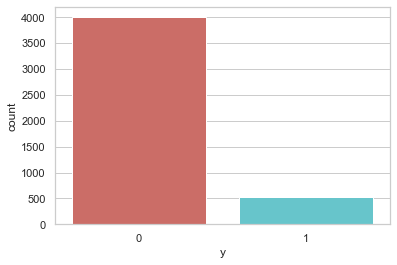

<Figure size 432x288 with 0 Axes>

In [12]:
#Describing Data Visually
import seaborn as sn
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [13]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
print(count_no_sub)
print(count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

4000
521
percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


In [14]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [15]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [16]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [17]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


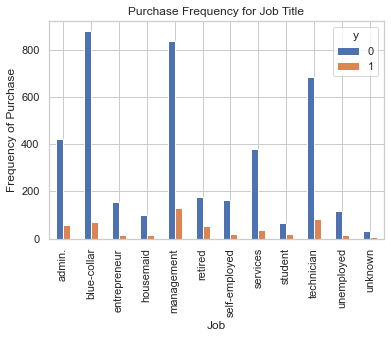

In [18]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')
#Job title is a good predictor of an outcome variable

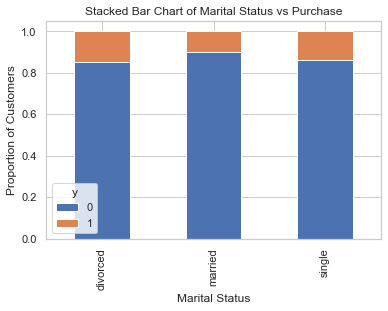

In [19]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')
#not a strong predictor for the outcome variable

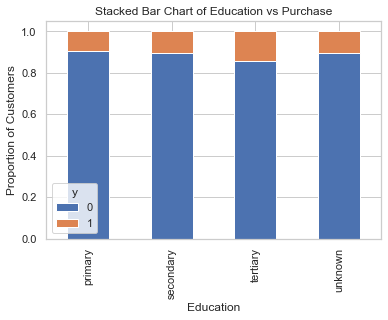

In [20]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')
#Education is a good predictor of outcome variable

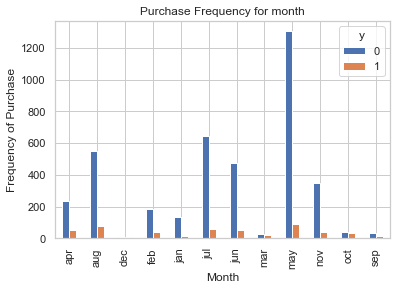

In [21]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_Month_bar')
#good predictor

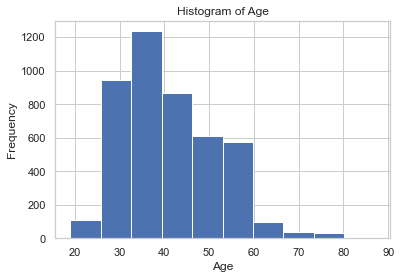

In [22]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
#Most of the customers of the bank in this dataset are in the age range of 30–40.

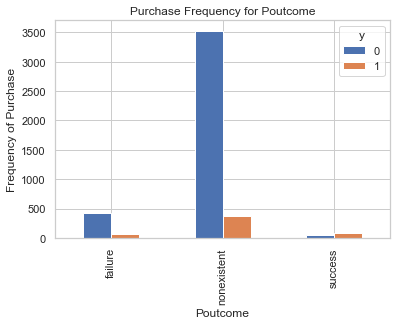

In [23]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')
#Good Predictor

Get Dummy Variables

In [24]:
data1 = data.copy()
data11 = pd.get_dummies(data1, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
display(data11)

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [25]:
x = data11.loc[:, data11.columns != 'y']
y = data11.loc[:, data11.columns == 'y']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=123)

In [27]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3164, 50) (1357, 50) (3164, 1) (1357, 1)


In [28]:
classifier = LogisticRegression()

Recursive Feature Elimination

In [29]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = classifier, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train.values.ravel())

In [30]:
for i, col in zip(range(x.shape[1]), x.columns):
    print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

age selected = False rank = 33
balance selected = False rank = 36
day selected = False rank = 30
duration selected = False rank = 29
campaign selected = False rank = 19
pdays selected = False rank = 35
previous selected = False rank = 26
job_admin. selected = False rank = 11
job_blue-collar selected = False rank = 7
job_entrepreneur selected = False rank = 24
job_housemaid selected = False rank = 32
job_management selected = False rank = 15
job_retired selected = True rank = 1
job_self-employed selected = False rank = 23
job_services selected = False rank = 17
job_student selected = False rank = 16
job_technician selected = False rank = 12
job_unemployed selected = False rank = 6
job_unknown selected = False rank = 31
marital_divorced selected = False rank = 13
marital_married selected = True rank = 1
marital_single selected = False rank = 22
education_primary selected = False rank = 20
education_secondary selected = False rank = 18
education_tertiary selected = False rank = 14
educati

In [31]:
cols = ['poutcome_success','poutcome_nonexistent','poutcome_failure',
        'month_oct','month_nov','month_may','month_mar','month_jul','month_jan',
        'month_dec','month_aug','contact_unknown',
        'loan_yes','marital_married','job_retired']
X = x[cols]
y = y['y']

Splitting the data to train and test data and fitting the logistic regression model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=123)
classifier = LogisticRegression()
model = classifier.fit(X_train, y_train)

In [33]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model.score(X_test, y_test)

0.8953574060427414

Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[1198,    3],
       [ 139,   17]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.8953574060427414

In [37]:
model.intercept_

array([-0.59318274])

In [38]:
model.coef_

array([[ 1.43321859, -0.6577927 , -0.77591457,  0.98818847, -0.78858625,
        -0.71694969,  0.99962158, -0.80888176, -0.70088408,  0.55982843,
        -0.6149187 , -1.06345314, -0.55541328, -0.42419332,  0.64653131]])

In [39]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([ 1.43, -0.66, -0.78,  0.99, -0.79, -0.72,  1.  , -0.81, -0.7 ,
        0.56, -0.61, -1.06, -0.56, -0.42,  0.65])

In [40]:
#The odd ratio that assoiciates the independent variables to subscription
pd.DataFrame({'log odds': log_odds}, index = X.columns)

,log odds
poutcome_success,1.43
poutcome_nonexistent,-0.66
poutcome_failure,-0.78
month_oct,0.99
month_nov,-0.79
month_may,-0.72
month_mar,1.00
month_jul,-0.81
month_jan,-0.70
month_dec,0.56


In [41]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, index = X.columns)

,odds
poutcome_success,4.18
poutcome_nonexistent,0.52
poutcome_failure,0.46
month_oct,2.69
month_nov,0.45
month_may,0.49
month_mar,2.72
month_jul,0.44
month_jan,0.50
month_dec,1.75


The poutcome success group has 4.18 times the odds of the other groups of subscribing.
nonexsistent poutcome is associated with 48% reduction of a chance of subscribing.
Poutcome failure also is associated with 54% reduction of the chance of subscribing.
Month October has 2.69 times the odds of the other predictors of subscribig.
Months Nov, May, Jul, Jan, Aug are assoiciated with 55% ,51%, 56% and 50%, 46% reduction of the chance of subscribing.
Month of March has 2.72 times the odds of the other groups of subscribing.
Month of December has greater chance of subscribing by 75%.
If they were married or had a loan they were more likely not to subscribe by 44% and 43%.
If they were retired the chance of subscribing increased by 92%.